# Do you know your stroke risk?

Source of the data: https://www.sciencedirect.com/science/article/pii/S0933365719302295?via%3Dihub
Liu, Tianyu; Fan, Wenhui; Wu, Cheng (2019), “Data for: A hybrid machine learning approach to cerebral stroke prediction based on imbalanced medical-datasets”, Mendeley Data, V1, doi: 10.17632/x8ygrw87jw.1

The medical dataset contains 43,400 records of potential patients which includes 783 occurrences of stroke. 

Cerebral stroke has become a significant global public health issue. The ideal solution to this concern is to prevent in advance by controlling related metabolic factors. However, it is difficult for medical staff to decide whether special precautions are needed for a potential patient only based on the monitoring of physiological indicators unless they are obviously abnormal. This project builds a machine learning model to predict whether someone is at risk of having a stroke.

The data in each row includes numerical factors, such as age and average glucose levels, and categorical factors, such as "has heart disease" (yes or no), work type, and smoking status. This is not an exhaustive list. We use this data to determine which factors contribute to having a stroke, and among those which hold the most weight.

## Basic analysis of the input dataset

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
#import seaborn as sns
%matplotlib inline
#sns.set_style('whitegrid')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#tensorflow.keras.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

# Read the golf course dataset
input_csv = pd.read_csv("data/stroke_dataset.csv", delimiter=',', skipinitialspace=True)
input_csv.shape

0.7.0


(43400, 12)

### Neural Network Code Below

In [28]:
def neural_net(X,y, filename):
    dim = X.shape[1]
    

    
    print("**********************")
    print(f"Before X: {X.shape}")
    print(f"Before y: {y.shape}")
    
    sm = SMOTE()
    X, y = sm.fit_resample(X,y)
      
    print("**********************")
    print(f"SMOTED X: {X.shape}")
    print(f"SMOTED y: {y.shape}")
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50)
    
    X_scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    # Step 1: Label-encode data set
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    encoded_y_train = label_encoder.transform(y_train)
    encoded_y_test = label_encoder.transform(y_test)
    # Step 2: Convert encoded labels to one-hot-encoding
    y_train_categorical = to_categorical(encoded_y_train)
    y_test_categorical = to_categorical(encoded_y_test)
    
    print(f"X_scaler: {X_scaler}")
    unit_num = 100
    
    # Create model and add layers
    model = Sequential()
    model.add(Dense(units=unit_num, activation='relu', input_dim=dim))
    model.add(Dense(units=unit_num, activation='relu'))
    model.add(Dense(units=unit_num, activation='relu'))
    model.add(Dense(units=unit_num, activation='relu'))
    model.add(Dense(units=unit_num, activation='relu'))
    
    
#     model.add(Dense(units=unit_num, activation='relu'))    
#     model.add(Dense(units=unit_num), activation='relu'))
    model.add(Dense(units=2, activation='softmax'))

    #categorical_crossentropy
    
    # Compile and fit the model
    model.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=[tf.keras.metrics.PrecisionAtRecall(recall = 0.85)])
    
    model.summary()
    model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=1
    )
    model_result = model.evaluate(
        X_test_scaled, y_test_categorical, verbose=2)
    
    print("/n")
    print("Test Results")
    print(f"Normal Neural Network - Loss: {model_result[0]}, Accuracy: {model_result[1]}")
    
    
    
    uniqueValues_train, occurCount_train = np.unique(y_train, return_counts=True)
    uniqueValues_test, occurCount_test = np.unique(y_test, return_counts=True)
    print(f"train unique values {uniqueValues_train}")
    print(f"train occur count {occurCount_train}")
    
    print(f"test unique values {uniqueValues_test}")
    print(f"test occur count {occurCount_test}")
   
    model.save(filename+".h5")
    
    return (model_result[1], model_result[0])

In [3]:
# Display the input data for preview
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


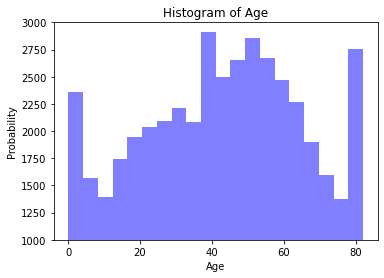

In [4]:
#plotting histogram of age

x = input_csv['age']
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.ylim([1000, 3000])
# add a 'best fit' line
#y = mlab.normpdf(bins, mu, sigma)

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title(r'Histogram of Age')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

### Looking into balanced datasets

In [5]:
stroke_data_df = input_csv.copy(deep=True)

In [6]:
stroke_data_df = stroke_data_df.dropna()


In [7]:
stroke_data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [8]:
stroke_data_df.shape

(29072, 12)

### Isolating Positive Stroke Data

In [9]:
stroke_positive = stroke_data_df[stroke_data_df['stroke'] == 0]

In [10]:

stroke_positive.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [11]:
stroke_positive.shape

(28524, 12)

## Isolating Negative Stroke Data

In [12]:
stroke_negative = stroke_data_df[stroke_data_df['stroke'] == 1]

In [13]:
stroke_negative.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
141,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
257,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
264,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
288,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [14]:
stroke_negative.shape

(548, 12)

In [15]:
print(f"Total Number of Stroke Positive {len(stroke_positive)}")
print(f"Total Number of Stroke Negative {len(stroke_negative)}")

Total Number of Stroke Positive 28524
Total Number of Stroke Negative 548


## Mapping String Data to Numeric



In [16]:
Gender = {"Other":2,"Male":1, "Female":0}
Married = {"Yes":1, "No":0}
Work_Type = {"Private":0, "Self-employed":1, "children":2, 
             "Govt_job":3,"Never_worked":4}
Residence = {"Urban":0, "Rural":1}
Smoking = {"never smoked":0, "formerly smoked":1, "smokes":2, "unknown":3}

In [17]:
stroke_negative["smoking_status"].value_counts()

never smoked       256
formerly smoked    180
smokes             112
Name: smoking_status, dtype: int64

In [18]:
stroke_negative = stroke_negative.replace({"gender":Gender, "ever_married":Married,
                                          "work_type":Work_Type, "Residence_type":Residence,
                                          "smoking_status":Smoking})

In [19]:
stroke_positive = stroke_positive.replace({"gender":Gender, "ever_married":Married,
                                          "work_type":Work_Type, "Residence_type":Residence,
                                          "smoking_status":Smoking})

In [20]:
stroke_negative.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,9046,1,67.0,0,1,1,0,0,228.69,36.6,1,1
141,31112,1,80.0,0,1,1,0,1,105.92,32.5,0,1
257,60182,0,49.0,0,0,1,0,0,171.23,34.4,2,1
264,1665,0,79.0,1,0,1,1,1,174.12,24.0,0,1
288,56669,1,81.0,0,0,1,0,0,186.21,29.0,1,1


In [21]:
stroke_negative["ever_married"].value_counts()

1    491
0     57
Name: ever_married, dtype: int64

In [22]:
stroke_negative.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

## Creating various Datasets

### Creating Data Set for Analysis - Equal set

In [29]:
column_headings=["Loss","Accuracy","TP", "TN", "FP", "FN"]
results_df = pd.DataFrame(columns = column_headings)
for i in range(0,1):
    
    stroke_negative_sample = stroke_negative.sample(548)
    stroke_positive_sample = stroke_positive.sample(28524)

    stroke_sample = pd.merge(stroke_negative_sample, stroke_positive_sample, how = 'outer')

    print(f"Negative data set {len(stroke_negative_sample)}")
    print(f"Positive data set {len(stroke_positive_sample)}")
    print(f"Combined data set {len(stroke_sample)}")
    print(f"Shape of combined {stroke_sample.shape}")

    X = stroke_sample.drop("stroke", axis = 1)
    y = stroke_sample["stroke"]
    filename = "junk-1"

    model_perf = neural_net(X,y, filename)

    ## Loading a model to test performance

    
    # Load the model
    from tensorflow.keras.models import load_model
    #filename = "NN_1B"
    stroke_model = load_model(filename+".h5")

    stroke_negative_sample = stroke_negative.sample(548)
    stroke_positive_sample = stroke_positive.sample(28524)
    stroke_sample = pd.merge(stroke_negative_sample, stroke_positive_sample, how = 'outer')

    X = stroke_sample.drop("stroke", axis = 1)
    y = stroke_sample["stroke"]
    print(X.shape, y.shape)

    X_scaler = MinMaxScaler().fit(X)
    X_scaled = X_scaler.transform(X)

    label_encoder = LabelEncoder()
    label_encoder.fit(y)
    encoded_y = label_encoder.transform(y)
    y_categorical = to_categorical(encoded_y)

    encoded_predictions = stroke_model.predict_classes(X_scaled)

    TN = 0
    TP = 0
    FN = 0
    FP = 0
    for i in range(0,len(encoded_y)):
        if encoded_predictions[i] == 0:
            if encoded_y[i] == 0:
                TN += 1
            else:
                FN += 1
        if encoded_predictions[i] == 1:
            if encoded_y[i] == 1:
                TP += 1
            else: 
                FP += 1
    total = FP+FN+TN+TP
    print(f"Total samples: {total}")
    print(f"True Positive: {TP}")
    print(f"True Negative: {TN}")
    print(f"False Positive: {FP}")
    print(f"False Negative: {FN}")
    
    result = {"Loss":model_perf[0], "Accuracy":model_perf[1], "TP":TP, "TN":TN, "FP":FP, "FN":FN}
    results_df = results_df.append(result, ignore_index = True)
    
results_df

Negative data set 548
Positive data set 28524
Combined data set 29072
Shape of combined (29072, 12)
**********************
Before X: (29072, 11)
Before y: (29072,)
**********************
SMOTED X: (57048, 11)
SMOTED y: (57048,)
X_scaler: MinMaxScaler()
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 100)               10100     

42786/42786 [==============================] - 3s 63us/sample - loss: 0.1265 - precision_at_recall_4: 0.9842
Epoch 56/1000
42786/42786 [==============================] - 3s 64us/sample - loss: 0.1278 - precision_at_recall_4: 0.9843
Epoch 57/1000
42786/42786 [==============================] - 3s 68us/sample - loss: 0.1219 - precision_at_recall_4: 0.98581s - loss: 0.1216 - pr
Epoch 58/1000
42786/42786 [==============================] - 3s 63us/sample - loss: 0.1242 - precision_at_recall_4: 0.9851
Epoch 59/1000
42786/42786 [==============================] - 3s 64us/sample - loss: 0.1224 - precision_at_recall_4: 0.9857
Epoch 60/1000
42786/42786 [==============================] - 3s 67us/sample - loss: 0.1217 - precision_at_recall_4: 0.9860
Epoch 61/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.1190 - precision_at_recall_4: 0.9866
Epoch 62/1000
42786/42786 [==============================] - 3s 64us/sample - loss: 0.1191 - precision_at_recall_4: 0.9870
Epoch 63

42786/42786 [==============================] - 3s 67us/sample - loss: 0.0708 - precision_at_recall_4: 0.9971
Epoch 120/1000
42786/42786 [==============================] - 3s 64us/sample - loss: 0.0705 - precision_at_recall_4: 0.9967
Epoch 121/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0689 - precision_at_recall_4: 0.9970
Epoch 122/1000
42786/42786 [==============================] - 3s 68us/sample - loss: 0.0669 - precision_at_recall_4: 0.9975
Epoch 123/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0730 - precision_at_recall_4: 0.9966
Epoch 124/1000
42786/42786 [==============================] - 3s 61us/sample - loss: 0.0695 - precision_at_recall_4: 0.9971
Epoch 125/1000
42786/42786 [==============================] - 3s 64us/sample - loss: 0.0674 - precision_at_recall_4: 0.9970
Epoch 126/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0647 - precision_at_recall_4: 0.9975
Epoch 127/1000
42786/42

42786/42786 [==============================] - 3s 66us/sample - loss: 0.0525 - precision_at_recall_4: 0.9984
Epoch 186/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0481 - precision_at_recall_4: 0.9995
Epoch 187/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0474 - precision_at_recall_4: 0.9991
Epoch 188/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0487 - precision_at_recall_4: 0.9991
Epoch 189/1000
42786/42786 [==============================] - 3s 68us/sample - loss: 0.0438 - precision_at_recall_4: 0.9992
Epoch 190/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0491 - precision_at_recall_4: 0.9989
Epoch 191/1000
42786/42786 [==============================] - 3s 68us/sample - loss: 0.0478 - precision_at_recall_4: 0.9991
Epoch 192/1000
42786/42786 [==============================] - 3s 75us/sample - loss: 0.0450 - precision_at_recall_4: 0.9991
Epoch 193/1000
42786/42

42786/42786 [==============================] - 3s 65us/sample - loss: 0.0410 - precision_at_recall_4: 0.9993
Epoch 251/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0355 - precision_at_recall_4: 0.9995
Epoch 252/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0394 - precision_at_recall_4: 0.9994
Epoch 253/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0388 - precision_at_recall_4: 0.9995
Epoch 254/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0373 - precision_at_recall_4: 0.9993
Epoch 255/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0445 - precision_at_recall_4: 0.9991
Epoch 256/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0316 - precision_at_recall_4: 0.9997
Epoch 257/1000
42786/42786 [==============================] - 3s 64us/sample - loss: 0.0391 - precision_at_recall_4: 0.9993
Epoch 258/1000
42786/42

42786/42786 [==============================] - 3s 65us/sample - loss: 0.0332 - precision_at_recall_4: 0.9995
Epoch 316/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0340 - precision_at_recall_4: 0.9992
Epoch 317/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0339 - precision_at_recall_4: 0.9993
Epoch 318/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0263 - precision_at_recall_4: 0.9997
Epoch 319/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0355 - precision_at_recall_4: 0.9993
Epoch 320/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0270 - precision_at_recall_4: 0.9996
Epoch 321/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0308 - precision_at_recall_4: 0.9994
Epoch 322/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0322 - precision_at_recall_4: 0.9992
Epoch 323/1000
42786/42

Epoch 381/1000
42786/42786 [==============================] - 3s 62us/sample - loss: 0.0291 - precision_at_recall_4: 0.9994
Epoch 382/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0279 - precision_at_recall_4: 0.9994
Epoch 383/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0299 - precision_at_recall_4: 0.9994
Epoch 384/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0259 - precision_at_recall_4: 0.9995
Epoch 385/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0295 - precision_at_recall_4: 0.9993
Epoch 386/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0283 - precision_at_recall_4: 0.9993
Epoch 387/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0269 - precision_at_recall_4: 0.9996
Epoch 388/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0265 - precision_at_recall_4: 0.9995
Epoch 38

42786/42786 [==============================] - 3s 65us/sample - loss: 0.0239 - precision_at_recall_4: 0.9995
Epoch 447/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0250 - precision_at_recall_4: 0.9995
Epoch 448/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0242 - precision_at_recall_4: 0.9995
Epoch 449/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0276 - precision_at_recall_4: 0.9994
Epoch 450/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0226 - precision_at_recall_4: 0.9994
Epoch 451/1000
42786/42786 [==============================] - 3s 64us/sample - loss: 0.0290 - precision_at_recall_4: 0.9994
Epoch 452/1000
42786/42786 [==============================] - 3s 64us/sample - loss: 0.0191 - precision_at_recall_4: 0.9996
Epoch 453/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0270 - precision_at_recall_4: 0.9995
Epoch 454/1000
42786/42

42786/42786 [==============================] - 3s 66us/sample - loss: 0.0235 - precision_at_recall_4: 0.9993
Epoch 512/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0229 - precision_at_recall_4: 0.99952s - loss:
Epoch 513/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0216 - precision_at_recall_4: 0.9995
Epoch 514/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0363 - precision_at_recall_4: 0.9992
Epoch 515/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0210 - precision_at_recall_4: 0.9994
Epoch 516/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0217 - precision_at_recall_4: 0.9997
Epoch 517/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0202 - precision_at_recall_4: 0.9996
Epoch 518/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0286 - precision_at_recall_4: 0.99940s - loss: 0.0

42786/42786 [==============================] - 3s 65us/sample - loss: 0.0188 - precision_at_recall_4: 0.9996
Epoch 575/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0268 - precision_at_recall_4: 0.9990
Epoch 576/1000
42786/42786 [==============================] - 3s 64us/sample - loss: 0.0193 - precision_at_recall_4: 0.9995
Epoch 577/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0247 - precision_at_recall_4: 0.9995
Epoch 578/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0201 - precision_at_recall_4: 0.9996
Epoch 579/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0248 - precision_at_recall_4: 0.9992
Epoch 580/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0198 - precision_at_recall_4: 0.9995
Epoch 581/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0237 - precision_at_recall_4: 0.9993
Epoch 582/1000
42786/42

Epoch 640/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0203 - precision_at_recall_4: 0.9995
Epoch 641/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0217 - precision_at_recall_4: 0.9995
Epoch 642/1000
42786/42786 [==============================] - 3s 63us/sample - loss: 0.0240 - precision_at_recall_4: 0.9993
Epoch 643/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0227 - precision_at_recall_4: 0.9994
Epoch 644/1000
42786/42786 [==============================] - 3s 64us/sample - loss: 0.0184 - precision_at_recall_4: 0.9997
Epoch 645/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0273 - precision_at_recall_4: 0.9992
Epoch 646/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0269 - precision_at_recall_4: 0.9991
Epoch 647/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0192 - precision_at_recall_4: 0.9995
Epoch 64

42786/42786 [==============================] - 3s 65us/sample - loss: 0.0248 - precision_at_recall_4: 0.9993
Epoch 705/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0176 - precision_at_recall_4: 0.9996
Epoch 706/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0207 - precision_at_recall_4: 0.9994
Epoch 707/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0248 - precision_at_recall_4: 0.9994
Epoch 708/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0219 - precision_at_recall_4: 0.9995
Epoch 709/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0195 - precision_at_recall_4: 0.9996
Epoch 710/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0299 - precision_at_recall_4: 0.9991
Epoch 711/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0192 - precision_at_recall_4: 0.9996
Epoch 712/1000
42786/42

42786/42786 [==============================] - 3s 64us/sample - loss: 0.0181 - precision_at_recall_4: 0.9993
Epoch 768/1000
42786/42786 [==============================] - ETA: 0s - loss: 0.0234 - precision_at_recall_4: 0.999 - 3s 64us/sample - loss: 0.0237 - precision_at_recall_4: 0.9993
Epoch 769/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0305 - precision_at_recall_4: 0.9992
Epoch 770/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0226 - precision_at_recall_4: 0.9994
Epoch 771/1000
42786/42786 [==============================] - 3s 68us/sample - loss: 0.0194 - precision_at_recall_4: 0.9995
Epoch 772/1000
42786/42786 [==============================] - 3s 68us/sample - loss: 0.0238 - precision_at_recall_4: 0.9995
Epoch 773/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0210 - precision_at_recall_4: 0.9994
Epoch 774/1000
42786/42786 [==============================] - 3s 65us/sample - loss: 0.0178

42786/42786 [==============================] - 3s 65us/sample - loss: 0.0192 - precision_at_recall_4: 0.9995
Epoch 833/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0237 - precision_at_recall_4: 0.9993
Epoch 834/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0197 - precision_at_recall_4: 0.9995
Epoch 835/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0236 - precision_at_recall_4: 0.9993
Epoch 836/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0240 - precision_at_recall_4: 0.9992
Epoch 837/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0233 - precision_at_recall_4: 0.9992
Epoch 838/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0126 - precision_at_recall_4: 0.9997
Epoch 839/1000
42786/42786 [==============================] - 3s 66us/sample - loss: 0.0207 - precision_at_recall_4: 0.9993
Epoch 840/1000
42786/42

42786/42786 [==============================] - 3s 69us/sample - loss: 0.0208 - precision_at_recall_4: 0.9994
Epoch 899/1000
42786/42786 [==============================] - 3s 69us/sample - loss: 0.0206 - precision_at_recall_4: 0.9993
Epoch 900/1000
42786/42786 [==============================] - 3s 69us/sample - loss: 0.0175 - precision_at_recall_4: 0.9995
Epoch 901/1000
42786/42786 [==============================] - 3s 70us/sample - loss: 0.0249 - precision_at_recall_4: 0.9992
Epoch 902/1000
42786/42786 [==============================] - 4s 82us/sample - loss: 0.0230 - precision_at_recall_4: 0.9993
Epoch 903/1000
42786/42786 [==============================] - 3s 68us/sample - loss: 0.0277 - precision_at_recall_4: 0.9990
Epoch 904/1000
42786/42786 [==============================] - 3s 67us/sample - loss: 0.0194 - precision_at_recall_4: 0.99941s - loss: 0.0171 - precisi
Epoch 905/1000
42786/42786 [==============================] - 3s 74us/sample - loss: 0.0156 - precision_at_recall_4: 0.9

42786/42786 [==============================] - 4s 104us/sample - loss: 0.0260 - precision_at_recall_4: 0.9992
Epoch 964/1000
42786/42786 [==============================] - 4s 104us/sample - loss: 0.0215 - precision_at_recall_4: 0.9992
Epoch 965/1000
42786/42786 [==============================] - 4s 103us/sample - loss: 0.0250 - precision_at_recall_4: 0.9991
Epoch 966/1000
42786/42786 [==============================] - 4s 100us/sample - loss: 0.0201 - precision_at_recall_4: 0.9994
Epoch 967/1000
42786/42786 [==============================] - 5s 109us/sample - loss: 0.0202 - precision_at_recall_4: 0.9994
Epoch 968/1000
42786/42786 [==============================] - 4s 96us/sample - loss: 0.0158 - precision_at_recall_4: 0.9995
Epoch 969/1000
42786/42786 [==============================] - 4s 102us/sample - loss: 0.0310 - precision_at_recall_4: 0.9990
Epoch 970/1000
42786/42786 [==============================] - 4s 98us/sample - loss: 0.0169 - precision_at_recall_4: 0.9995
Epoch 971/1000
42

,Loss,Accuracy,TP,TN,FP,FN
0,0.965557,1.057109,485.0,27809.0,715.0,63.0


In [24]:
results_df.to_csv(filename+".csv")



## Analysis of Tests

A data set of values for different training sets and layer numbers was setup for analysis.  Each was run independently and then exported as a CSV file.  These were imported into excel for basic combining.  A master CSV was generated to allow comparison of conditions.

In [ ]:
# loading data
nn_perf_df = pd.read_csv("support_docs\master_data_NN.csv")

In [ ]:
nn_perf_df

In [ ]:
nn_perf_df["Layers"].value_counts()

In [ ]:
nn_perf_df["Accuracy"] = (nn_perf_df["Accuracy"].str.strip("%").astype(float))
nn_perf_df["Precision"] = (nn_perf_df["Precision"].str.strip("%").astype(float))
nn_perf_df["Recall"] = (nn_perf_df["Recall"].str.strip("%").astype(float))
nn_perf_df["F1"] = (nn_perf_df["F1"].str.strip("%").astype(float))

In [ ]:
nn_perf_df.dtypes

In [ ]:
nn_perf_df["Layer 1"].value_counts()

In [ ]:
# Effect of Layers and Training Size

from matplotlib import cm
layers = [1,4]
training = [548, 20000]

#plot 1
red_diamond = dict(markerfacecolor='r', marker='D')
fig = plt.figure(figsize = (15,12))
ax1 = fig.add_subplot(321)
#fig1, ax1 = plt.subplots()
ax1.set_title('Accuracy vs Number of Layers')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(-5,100)
ax1.boxplot([nn_perf_df["Accuracy"][nn_perf_df["Layers"]==layers[i]] for i in range(0,len(layers))], labels=layers, showfliers = True,
           flierprops = red_diamond)

#plot 2
ax2 = fig.add_subplot(322)
#fig1, ax1 = plt.subplots()
ax2.set_title('Recall vs Number of Layers')
ax2.set_ylabel('Recall')
ax2.set_ylim(-5,100)

x=[]
y =[]
for i in range(0,len(nn_perf_df)):
    if nn_perf_df.iloc[i][3] == 4:
        x.append(1.75)
    else:
        x.append(0.75)
    y.append(nn_perf_df.iloc[i][27])
ax2.scatter(x,y, c=cm.prism(x), alpha = 0.4)
ax2.boxplot([nn_perf_df["Recall"][nn_perf_df["Layers"]==layers[i]] for i in range(0,len(layers))], labels=layers, showfliers = True,
          flierprops = red_diamond)

#plot 3
ax3 = fig.add_subplot(323)
#fig1, ax1 = plt.subplots()
ax3.set_title('Accuracy vs Training Size')
ax3.set_ylabel('Accuracy')
ax3.set_ylim(-5,100)
ax3.boxplot([nn_perf_df["Accuracy"][nn_perf_df["N-Negative"]==training[i]] for i in range(0,len(training))], labels=training, showfliers = True,
           flierprops = red_diamond)

#plot4
ax4 = fig.add_subplot(324)
#fig1, ax1 = plt.subplots()
ax4.set_title('Recall vs Training Size')
ax4.set_ylabel('Recall')
ax4.set_ylim(-5,100)
ax4.boxplot([nn_perf_df["Recall"][nn_perf_df["N-Negative"]==training[i]] for i in range(0,len(training))], labels=training, showfliers = True,
           flierprops = red_diamond)

#plot5
x=[]
y =[]
for i in range(0,len(nn_perf_df)):
    if nn_perf_df.iloc[i][0] == 20000:
        x.append(1.75)
    else:
        x.append(0.75)
    y.append(nn_perf_df.iloc[i][26])
    
ax4 = fig.add_subplot(325)
#fig1, ax1 = plt.subplots()
ax4.set_title('Precision vs Training Size')
ax4.set_ylabel('Precision')
ax4.set_ylim(-5,100)
ax4.boxplot([nn_perf_df["Precision"][nn_perf_df["N-Negative"]==training[i]] for i in range(0,len(training))], labels=training, showfliers = True,
           flierprops = red_diamond)
ax4.scatter(x,y, c=cm.prism(x), alpha = 0.4)

#plot6
ax4 = fig.add_subplot(326)
#fig1, ax1 = plt.subplots()
ax4.set_title('F1 vs Training Size')
ax4.set_ylabel('F1')
ax4.set_ylim(-5,100)
ax4.boxplot([nn_perf_df["F1"][nn_perf_df["N-Negative"]==training[i]] for i in range(0,len(training))], labels=training, showfliers = True,
           flierprops = red_diamond)

plt.show()



In [ ]:
type(x[1])


In [ ]:
type(layers[1])